In this notebook I will implement a long short term memory (LSTM) neural network to predict the closing stock price of a corporation (Apple) using the past 60 day stock price.

In [19]:
# Import libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
# get the stock quote
df = yf.Ticker('AAPL').history(period='10y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-18 00:00:00-04:00,21.862493,22.057834,21.749286,22.011219,190288000,0.00,0.0
2014-08-19 00:00:00-04:00,22.066716,22.348625,22.046737,22.315329,277596000,0.00,0.0
2014-08-20 00:00:00-04:00,22.295347,22.439631,22.186577,22.324203,210796000,0.00,0.0
2014-08-21 00:00:00-04:00,22.324209,22.406341,22.222100,22.326429,133912000,0.00,0.0
2014-08-22 00:00:00-04:00,22.262051,22.523983,22.239853,22.490686,176736000,0.00,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,216.070007,219.509995,215.600006,217.529999,38028100,0.25,0.0
2024-08-13 00:00:00-04:00,219.009995,221.889999,219.009995,221.270004,44155300,0.00,0.0
2024-08-14 00:00:00-04:00,220.570007,223.029999,219.699997,221.720001,41960600,0.00,0.0


In [13]:
df.shape

(2517, 7)

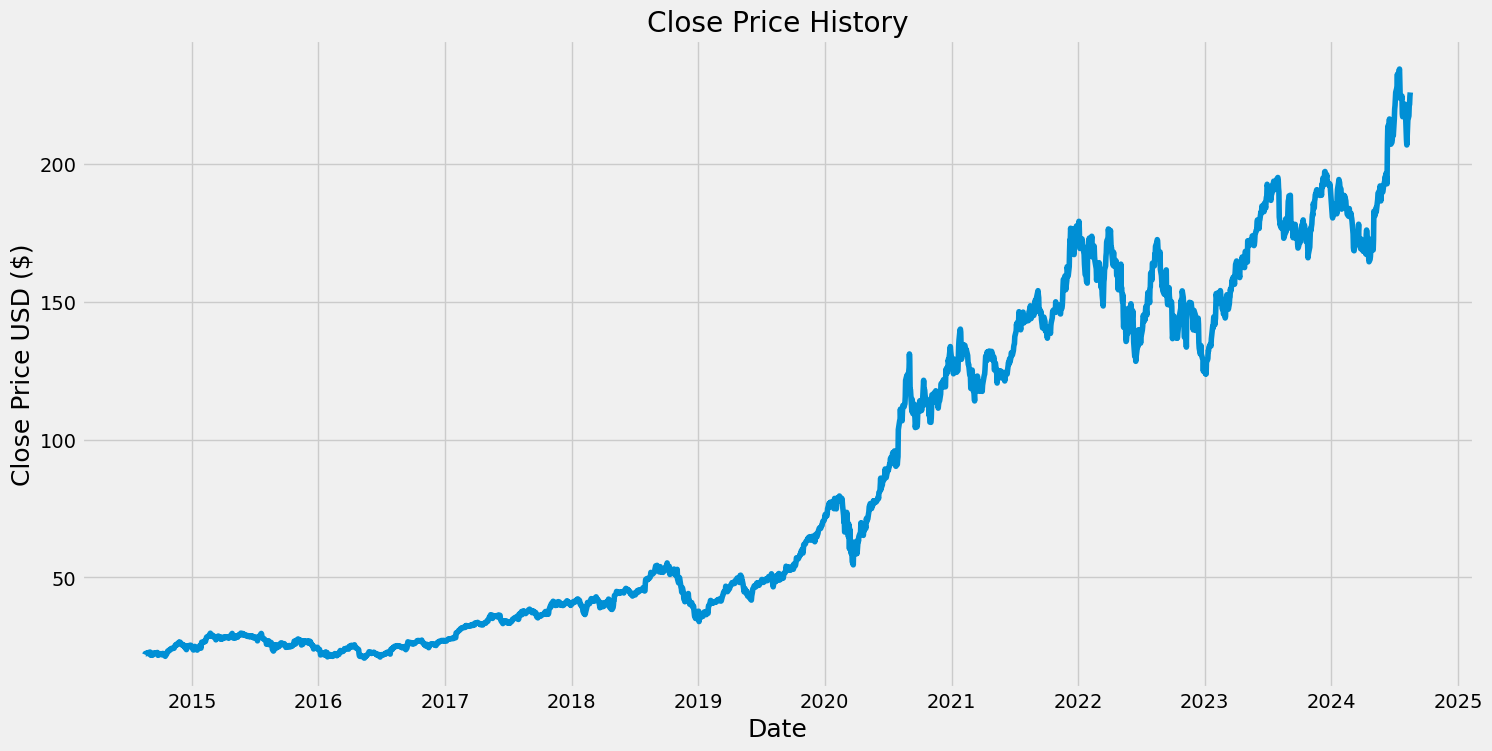

In [15]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
# Create a new data frame with only the 'Close' column
data = df[['Close']]

# convert to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2014

In [20]:
# scale the data
scaler = StandardScaler() # In the video he uses MinMaxScaler, but I believe StandardScaler is more appropriate
# because stocks prices are not bound to a specific range
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-1.05544945],
       [-1.05047724],
       [-1.05033213],
       ...,
       [ 2.20980014],
       [ 2.2588503 ],
       [ 2.2805959 ]])

In [21]:
# create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])



In [22]:
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1954, 60, 1)